In [41]:
#Zombie Display
# zombie apocalypse modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import integrate
from scipy.optimize import fmin
#=====================================================
#Notice we must import the Model Definition
# from zombiewithdata import eq

def eq(parms,y0,t):
     #differential-eq-system----------------------
     def funct(y,t):
        Si, Zi, Ri=y0
        P,d,B,G,A=params
        # the model equations (see Munz et al. 2009)
        f0 = P - B*Si*Zi - d*Si
        f1 = B*Si*Zi + G*Ri - A*Si*Zi
        f2 = d*Si + A*Si*Zi - G*Ri
        return [f0, f1, f2]
     #integrate------------------------------------
     ds = odeint(funct,y0,t)
#     print(ds)
#      return ds.T

     return ds
   
#=====================================================
 
#1.Get Data
#====================================================
Td=np.array([0.5,1,1.5,2,2.2,3,3.5,4,4.5,5])#time
Zd=np.array([0,2,2,5,2,10,15,50,250,400])#zombie pop
#====================================================
 
#2.Set up Info for Model System
#===================================================
# model parameters
#----------------------------------------------------
P = 0       # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy perecent (per day)
rates=(P,d,B,G,A)
 
# model initial conditions
#---------------------------------------------------
S0 = 500.               # initial population
Z0 = 0                  # initial zombie population
R0 = 0                  # initial death population
y0 = [S0, Z0, R0]      # initial condition vector
 
# model steps
#---------------------------------------------------
start_time=0.0
end_time=5.0
intervals=1000
mt=np.linspace(start_time,end_time,intervals)
 
# model index to compare to data
#----------------------------------------------------
findindex=lambda x:np.where(mt>=x)[0][0]
mindex=map(findindex,Td)
#=======================================================
 
 
 
#3.Score Fit of System
#=========================================================
def score(parms):
    #a.Get Solution to system
    F0,F1,F2,T=eq(parms,y0,start_time,end_time,intervals)
    #b.Pick of Model Points to Compare
    Zm=F1[mindex]
    #c.Score Difference between model and data points
    ss=lambda data,model:((data-model)**2).sum()
    return ss(Zd,Zm)
#========================================================
 
 
#4.Optimize Fit
#=======================================================
fit_score=score(rates)
answ=fmin(score,(rates),full_output=1,maxiter=1000000)
bestrates=answ[0]
bestscore=answ[1]
P,d,B,G,A=answ[0]
newrates=(P,d,B,G,A)
#=======================================================
 
#5.Generate Solution to System
#=======================================================
F0,F1,F2,T=eq(newrates,y0,(start_time,end_time,intervals))
Zm=F1[mindex]
Tm=T[mindex]


# Tm=np.append([0],Td)
# Sm,Zm,Rm=eq(rates,y0,Tm)

#======================================================
 
 
 
 
#6. Plot Solution to System
#=========================================================
plt.figure()
plt.plot(T,F1,'b-',Tm,Zm,'ro',Td,Zd,'go')
plt.legend(('Zombies','Model Points','Data Points'),
           'upper center')
plt.xlabel('days')
plt.ylabel('population')
title='Zombie Apocalypse  Fit Score: '+str(bestscore)
plt.title(title)
#=========================================================


TypeError: eq() takes 3 positional arguments but 5 were given

In [4]:
Td=np.array([0.5,1,1.5,2,2.2,3,3.5,4,4.5,5])#time
Zd=np.array([0,2,2,5,2,10,15,50,250,400])#zombie pop

findindex=lambda x:np.where(mt>=x)[0][0]
mindex=map(findindex,Td)

In [5]:
findindex

<function __main__.<lambda>(x)>

In [6]:
mindex

In [13]:
start_time=0.0
end_time=5.0
intervals=1000
mt=np.linspace(start_time,end_time,intervals)

In [14]:
mt

array([0.        , 0.00500501, 0.01001001, 0.01501502, 0.02002002,
       0.02502503, 0.03003003, 0.03503504, 0.04004004, 0.04504505,
       0.05005005, 0.05505506, 0.06006006, 0.06506507, 0.07007007,
       0.07507508, 0.08008008, 0.08508509, 0.09009009, 0.0950951 ,
       0.1001001 , 0.10510511, 0.11011011, 0.11511512, 0.12012012,
       0.12512513, 0.13013013, 0.13513514, 0.14014014, 0.14514515,
       0.15015015, 0.15515516, 0.16016016, 0.16516517, 0.17017017,
       0.17517518, 0.18018018, 0.18518519, 0.19019019, 0.1951952 ,
       0.2002002 , 0.20520521, 0.21021021, 0.21521522, 0.22022022,
       0.22522523, 0.23023023, 0.23523524, 0.24024024, 0.24524525,
       0.25025025, 0.25525526, 0.26026026, 0.26526527, 0.27027027,
       0.27527528, 0.28028028, 0.28528529, 0.29029029, 0.2952953 ,
       0.3003003 , 0.30530531, 0.31031031, 0.31531532, 0.32032032,
       0.32532533, 0.33033033, 0.33533534, 0.34034034, 0.34534535,
       0.35035035, 0.35535536, 0.36036036, 0.36536537, 0.37037

In [15]:
findindex=lambda x:np.where(mt>=x)[0][0]

In [16]:
findindex

<function __main__.<lambda>(x)>

[   5.107   15.593  178.942  351.23   523.172 1039.449 1223.34 ]
[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 35
    # data points      = 7
    # variables        = 3
    chi-square         = 24.8406124
    reduced chi-square = 6.21015310
    Akaike info crit   = 14.8659883
    Bayesian info crit = 14.7037188
[[Variables]]
    offset:  4.05093442 +/- 1.80069194 (44.45%) (init = 0)
    scale:   0.01341703 +/- 0.01831231 (136.49%) (init = 1)
    decay:   1.11970981 +/- 0.19049621 (17.01%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(scale, decay)  = -0.999
    C(offset, scale) = -0.697
    C(offset, decay) =  0.672


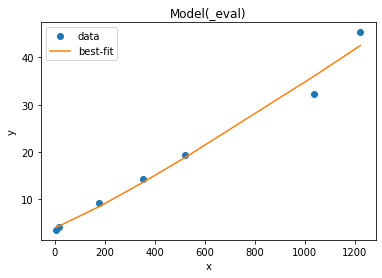

In [37]:
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt

x = np.array((5.107, 15.593, 178.942, 351.23, 523.172, 1039.449, 1223.34))
y = np.array((3.57, 4.09, 9.19, 14.3, 19.41, 32.17, 45.3))
i=1
print(x)

from lmfit.models import ExpressionModel
model = ExpressionModel('offset + scale*x**decay')
# def expfunc(x, scale, decay, offset):
#      "model exponential decay with offset"
#     return offset+scale*x**decay

# create model from the above model function
# model = Model(expfunc)

# create parameters with initial values, 
# using names from model function
params = model.make_params(offset=0, scale=1, decay=1)

# fit data 'y' to model with params
result = model.fit(y, params, x=x)

# print and plot result 
print(result.fit_report())
result.plot_fit()
plt.show()

In [ ]:
import pandas as pd
path = 'DataForThai.csv'
df = pd.read_csv(path)

In [ ]:
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt

x = np.array((5.107, 15.593, 178.942, 351.23, 523.172, 1039.449, 1223.34))
y = np.array((3.57, 4.09, 9.19, 14.3, 19.41, 32.17, 45.3))
i=1
print(x)

from lmfit.models import ExpressionModel
model = ExpressionModel('offset + scale*x**decay')
# def expfunc(x, scale, decay, offset):
#      "model exponential decay with offset"
#     return offset+scale*x**decay

# create model from the above model function
# model = Model(expfunc)

# create parameters with initial values, 
# using names from model function
params = model.make_params(offset=0, scale=1, decay=1)

# fit data 'y' to model with params
result = model.fit(y, params, x=x)

# print and plot result 
print(result.fit_report())
result.plot_fit()
plt.show()

Initial SSE Objective: 54.147050727638714
Final SSE Objective: 1.3675647741318953
U: 2.588095621283199
alpha1: 0.00530680971120946
alpha2: 0.0028852717986914116


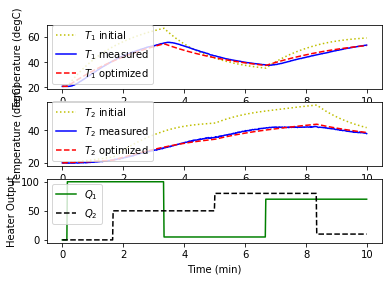

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize
import pandas as pd

# generate data file from TCLab or get sample data file from:
#  https://apmonitor.com/pdc/index.php/Main/ArduinoEstimation2
# Import data file
# Column 1 = time (t)
# Column 2 = input (u)
# Column 3 = output (yp)
data = np.loadtxt('data.txt',delimiter=',',skiprows=1)
# extract data columns
t = data[:,0].T
Q1 = data[:,1].T
Q2 = data[:,2].T
T1meas = data[:,3].T
T2meas = data[:,4].T

# number of time points
ns = len(t)

# define energy balance model
def heat(x,t,Q1,Q2,p):
    # Optimized parameters
    U,alpha1,alpha2 = p

    # Parameters
    Ta = 23 + 273.15   # K
    m = 4.0/1000.0     # kg
    Cp = 0.5 * 1000.0  # J/kg-K    
    A = 10.0 / 100.0**2 # Area in m^2
    As = 2.0 / 100.0**2 # Area in m^2
    eps = 0.9          # Emissivity
    sigma = 5.67e-8    # Stefan-Boltzman

    # Temperature States 
    T1 = x[0] + 273.15
    T2 = x[1] + 273.15

    # Heat Transfer Exchange Between 1 and 2
    conv12 = U*As*(T2-T1)
    rad12  = eps*sigma*As * (T2**4 - T1**4)

    # Nonlinear Energy Balances
    dT1dt = (1.0/(m*Cp))*(U*A*(Ta-T1) \
            + eps * sigma * A * (Ta**4 - T1**4) \
            + conv12 + rad12 \
            + alpha1*Q1)
    dT2dt = (1.0/(m*Cp))*(U*A*(Ta-T2) \
            + eps * sigma * A * (Ta**4 - T2**4) \
            - conv12 - rad12 \
            + alpha2*Q2)

    return [dT1dt,dT2dt]

def simulate(p):
    T = np.zeros((len(t),2))
    T[0,0] = T1meas[0]
    T[0,1] = T2meas[0]    
    T0 = T[0]
    for i in range(len(t)-1):
        ts = [t[i],t[i+1]]
        y = odeint(heat,T0,ts,args=(Q1[i],Q2[i],p))
        T0 = y[-1]
        T[i+1] = T0
    return T

# define objective
def objective(p):
    # simulate model
    Tp = simulate(p)
    # calculate objective
    obj = 0.0
    for i in range(len(t)):
        obj += ((Tp[i,0]-T1meas[i])/T1meas[i])**2 \
              +((Tp[i,1]-T2meas[i])/T2meas[i])**2
    # return result
    return obj

# Parameter initial guess
U = 10.0           # Heat transfer coefficient (W/m^2-K)
alpha1 = 0.0100    # Heat gain 1 (W/%)
alpha2 = 0.0075    # Heat gain 2 (W/%)
p0 = [U,alpha1,alpha2]

# show initial objective
print('Initial SSE Objective: ' + str(objective(p0)))

# optimize parameters
# bounds on variables
bnds = ((2.0, 20.0),(0.005,0.02),(0.002,0.015))
solution = minimize(objective,p0,method='SLSQP',bounds=bnds)
p = solution.x

# show final objective
print('Final SSE Objective: ' + str(objective(p)))

# optimized parameter values
U = p[0]
alpha1 = p[1]
alpha2 = p[2]
print('U: ' + str(U))
print('alpha1: ' + str(alpha1))
print('alpha2: ' + str(alpha2))

# calculate model with updated parameters
Ti  = simulate(p0)
Tp  = simulate(p)

# Plot results
plt.figure(1)

plt.subplot(3,1,1)
plt.plot(t/60.0,Ti[:,0],'y:',label=r'$T_1$ initial')
plt.plot(t/60.0,T1meas,'b-',label=r'$T_1$ measured')
plt.plot(t/60.0,Tp[:,0],'r--',label=r'$T_1$ optimized')
plt.ylabel('Temperature (degC)')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(t/60.0,Ti[:,1],'y:',label=r'$T_2$ initial')
plt.plot(t/60.0,T2meas,'b-',label=r'$T_2$ measured')
plt.plot(t/60.0,Tp[:,1],'r--',label=r'$T_2$ optimized')
plt.ylabel('Temperature (degC)')
plt.legend(loc='best')

plt.subplot(3,1,3)
plt.plot(t/60.0,Q1,'g-',label=r'$Q_1$')
plt.plot(t/60.0,Q2,'k--',label=r'$Q_2$')
plt.ylabel('Heater Output')
plt.legend(loc='best')

plt.xlabel('Time (min)')
plt.show()

In [86]:
np.zeros((len(t),2)).shape

(599, 2)

In [52]:
T.shape

(1001,)

In [53]:
data.shape

(599, 7)

In [54]:
t.shape

(599,)

In [55]:
p

array([2.58809562, 0.00530681, 0.00288527])

In [61]:
solution

     fun: 1.3675647741318953
     jac: array([ 3.85315716e-03,  1.32133189e+00, -3.92953673e+00])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([2.58809562, 0.00530681, 0.00288527])

In [74]:
T[3]

0.015

In [66]:
Tp.shape

(599, 2)

In [81]:
T2meas[67]

20.71

In [69]:
T2meas.shape

(599,)

In [79]:
[t[i],t[i+1]]

[1.0012845993041992, 2.001270294189453]

In [82]:
 for i in range(len(t)-1):
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [83]:
T[0]

0.0

In [84]:
T

array([0.   , 0.005, 0.01 , ..., 4.99 , 4.995, 5.   ])

In [85]:
T.shape

(1001,)

In [87]:
data[:,1][0]

0.0

In [88]:
T

array([0.   , 0.005, 0.01 , ..., 4.99 , 4.995, 5.   ])

In [89]:
T1meas = data[:,3].T
T2meas = data[:,4].T

In [90]:
T = np.zeros((len(t),2))
T[0,0] = T1meas[0]
T[0,1] = T2meas[0]    
#  T0 = T[0]

In [91]:
T

array([[20.83, 19.93],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ]])

In [93]:
T[0].shape

(2,)

In [95]:
T[0]

array([20.83, 19.93])